In [4]:
# Python 3.8.12  

import pandas as pd
import numpy as np
from skimage import data
import matplotlib.pyplot as plt 

In [47]:
rocket_image = data.rocket()


In [6]:
rocket_image

array([[[ 17,  33,  58],
        [ 17,  33,  58],
        [ 17,  33,  59],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  7,  18,  36]],

       [[ 17,  33,  58],
        [ 17,  33,  58],
        [ 17,  33,  59],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  8,  19,  37]],

       [[ 18,  34,  59],
        [ 18,  34,  59],
        [ 18,  34,  60],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  8,  19,  37]],

       ...,

       [[ 27,  28,  32],
        [ 29,  29,  37],
        [ 20,  24,  36],
        ...,
        [136, 106,  82],
        [186, 136,  85],
        [173, 119,  81]],

       [[ 26,  27,  31],
        [ 29,  32,  39],
        [ 30,  34,  46],
        ...,
        [103,  67,  45],
        [ 97,  61,  27],
        [ 76,  49,  20]],

       [[ 26,  27,  31],
        [ 29,  32,  39],
        [ 40,  46,  60],
        ...,
        [ 82,  53,  37],
        [ 79,  50,  32],
        [ 83,  61,  37]]

In [7]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

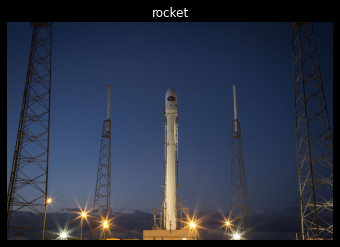

In [35]:
show_image(rocket_image, 'rocket')

In [75]:
from skimage.color import rgb2gray
rocket_image_gray = rgb2gray(rocket_image)


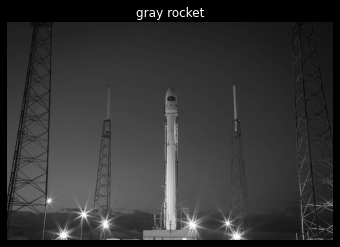

In [76]:
show_image(rocket_image_gray, 'gray rocket')

In [77]:
red = rocket_image[:, :, 0]
green = rocket_image[:, :, 1]
blue = rocket_image[:, :, 2]

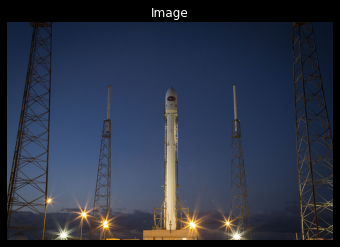

In [78]:
show_image(rocket_image)

In [79]:
# 
# img = plt.imread('/.jpeg')

In [80]:
rocket_image_flipp = np.flipud(rocket_image)

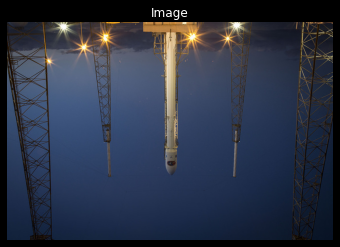

In [81]:
show_image(rocket_image_flipp)

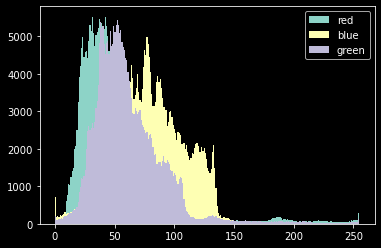

In [82]:
plt.hist(red.ravel(), bins=256)
plt.hist(blue.ravel(), bins=256)
plt.hist(green.ravel(), bins=256)
plt.legend(['red', 'blue', 'green'])
plt.show()

# Ravel retorna uma matriz cpntinua dos valores da cor da imagem
# Definimos bins como 256 porque mostraremos o número de pixels para cada valor de pixel.

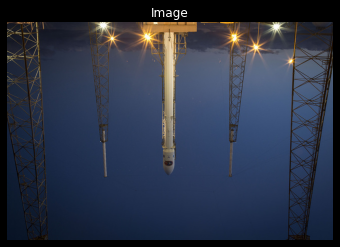

In [83]:
rocket_image_flipp_plr = np.fliplr(rocket_image_flipp)
show_image(rocket_image_flipp_plr)

In [84]:
# Estudar esses metodos mais a  fundo
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local

In [85]:
img_peste = plt.imread('./images.jfif')
img_normal = plt.imread('./imagens_normal.jpg')
img_peste_cafe = plt.imread('./imagens_praga.png')

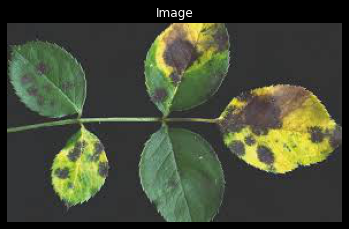

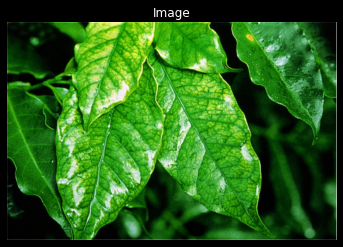

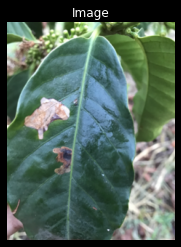

In [86]:
show_image(img_peste)
show_image(img_normal)
show_image(img_peste_cafe)

In [87]:
img_peste_gray = rgb2gray(img_peste)
img_normal_cafe_gray = rgb2gray(img_normal)
img_peste_cafe_gray = rgb2gray(img_peste_cafe)

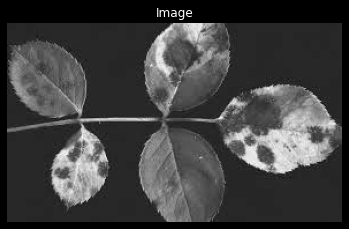

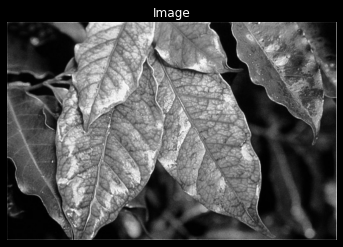

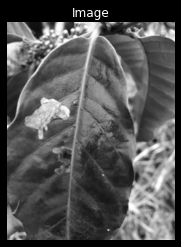

In [88]:
show_image(img_peste_gray)
show_image(img_normal_cafe_gray)
show_image(img_peste_cafe_gray)

In [93]:
# binary global
thresh_leaf_normal = threshold_otsu(img_peste_gray)
thresh_leaf_cafe = threshold_otsu(img_normal_cafe_gray)
thresh_leaf_cafe_pest = threshold_otsu(img_peste_cafe_gray)
binary1 = img_peste_gray > thresh_leaf_normal
binary2 = img_normal_cafe_gray > thresh_leaf_cafe
binary3 = img_peste_cafe_gray >  thresh_leaf_cafe_pest

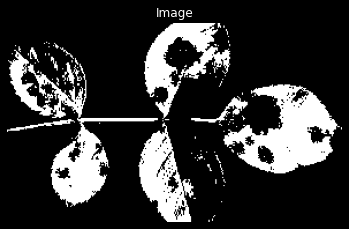

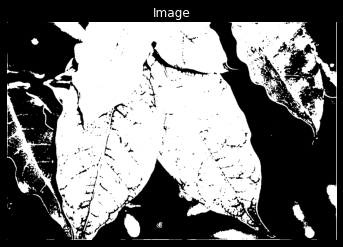

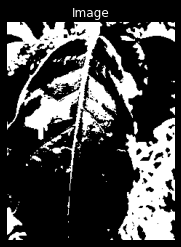

In [94]:
show_image(binary1)
show_image(binary2)
show_image(binary3)

In [99]:
# por outro lado 
thresh_leaf_normal = threshold_otsu(img_peste_gray)
thresh_leaf_cafe = threshold_otsu(img_normal_cafe_gray)
thresh_leaf_cafe_pest = threshold_otsu(img_peste_cafe_gray)
binary1 = img_peste_gray < thresh_leaf_normal
binary2 = img_normal_cafe_gray < thresh_leaf_cafe
binary3 = img_peste_cafe_gray < thresh_leaf_cafe_pest

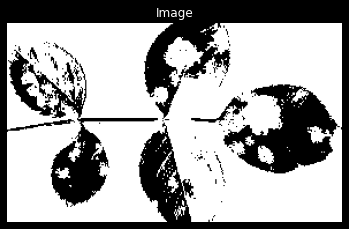

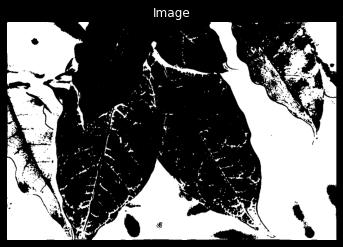

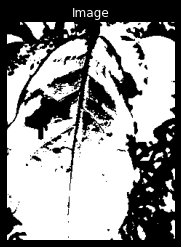

In [100]:
show_image(binary1)
show_image(binary2)
show_image(binary3)


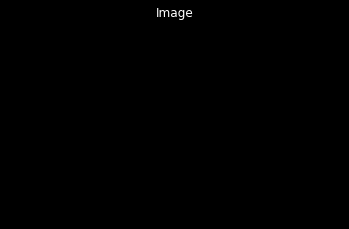

' \n    Funciona melhor em imagens escritas\n'

In [110]:
# local
block_size = 35
local_thresh = threshold_local(img_peste_gray, block_size, offset=10)
binary4 = img_peste_gray < local_thresh
show_image(binary4)
''' 
    Funciona melhor em imagens escritas
'''

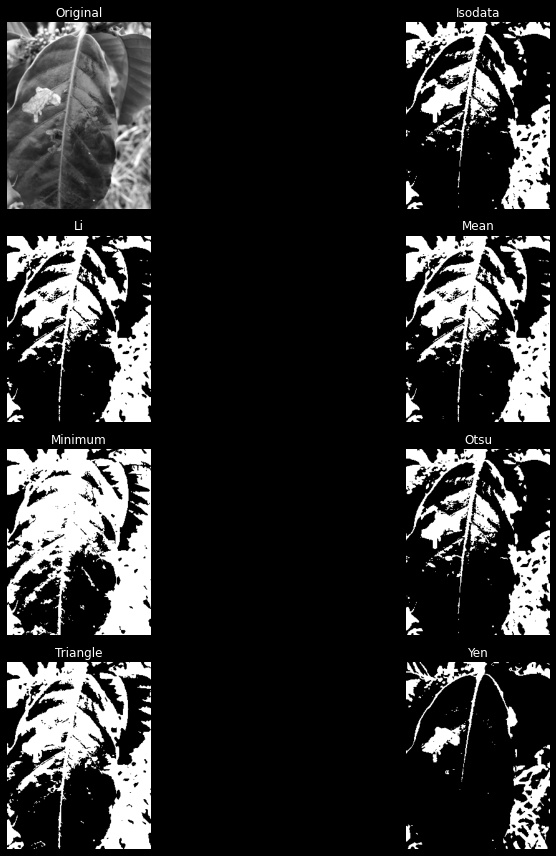

In [115]:
''' 
    Testar todos os metodos do threshold
'''
fig, ax = try_all_threshold(img_peste_cafe_gray, verbose=False, figsize=(15,12))
plt.show()
